<a href="https://colab.research.google.com/github/akshay1621997/SHALA2020/blob/master/Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [1]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv('train.csv')
movies = pd.read_csv('moviesData.csv')

In [3]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [4]:
# Print the first five rows of MonthlyRate
df[:10]['MonthlyRate']

0    19479
1    24907
2     2396
3    23159
4    16632
5    11864
6     9964
7    13335
8     8787
9    16577
Name: MonthlyRate, dtype: int64

In [5]:
# Find the details of MonthlyRate 
print(df['MonthlyRate'].dtypes)
print(df.MonthlyRate.describe())

int64
count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64


---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [6]:
# Check for missing values 
print("The number of missing values in df are:",df.isna().sum())

# Drop the missing values 
df = df.dropna()

# Print the size of df after dropping 
print(df.shape)


The number of missing values in df are: Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [7]:
# Add a column named MonthRateNew 
mrn = (df.MonthlyRate-df.MonthlyRate.mean())/df.MonthlyRate.std()
df.insert(20,'MonthlyRateNew',mrn,True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,MonthlyRateNew,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,0.742749,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1.512813,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,-1.680795,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1.264827,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,0.338849,9,No,12,3,4,1,6,3,3,2,2,2,2,4


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [8]:
# Check for missing values 
print("The missing values in Movies dataset are:",movies.isna().sum())
# Drop the missing values 
print(movies.shape)
print(movies.dropna().shape)

The missing values in Movies dataset are: Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
(600, 31)
(572, 31)


In [0]:
# Replace the missing values 
# You can use SimpleImputer of sklearn for this

from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_median = imputer_median.fit(movies[['dvd_rel_year','dvd_rel_month','dvd_rel_day','runtime']])
movies[['dvd_rel_year','dvd_rel_month','dvd_rel_day','runtime']] = imputer_median.transform(movies[['dvd_rel_year','dvd_rel_month','dvd_rel_day','runtime']])

imputer_constant = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value = "Will be Announced")
imputer_constant = imputer_constant.fit(movies[['studio','director','actor1','actor2','actor3','actor4','actor5']])
movies[['studio','director','actor1','actor2','actor3','actor4','actor5']] = imputer_constant.transform(movies[['studio','director','actor1','actor2','actor3','actor4','actor5']])

In [10]:
print(movies.shape)#Verification of all NaN values being replaced
print(movies.dropna().shape)

(600, 31)
(600, 31)


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

(array([15.,  9., 22.,  7., 17., 52., 36., 75., 46., 45., 83., 51., 99.,
        41., 37., 59., 29., 56., 21., 27., 36., 12., 37., 18., 17., 27.,
        16., 13., 11., 14.]),
 array([18. , 19.4, 20.8, 22.2, 23.6, 25. , 26.4, 27.8, 29.2, 30.6, 32. ,
        33.4, 34.8, 36.2, 37.6, 39. , 40.4, 41.8, 43.2, 44.6, 46. , 47.4,
        48.8, 50.2, 51.6, 53. , 54.4, 55.8, 57.2, 58.6, 60. ]),
 <a list of 30 Patch objects>)

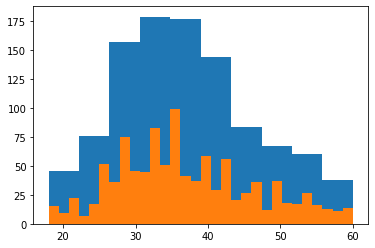

In [11]:
# Plot and modify the histogram of Age
plt.hist(df.Age)#Most number of people in the arnge of 30-40
plt.hist(df.Age,bins=30)#Orange one for 30bins



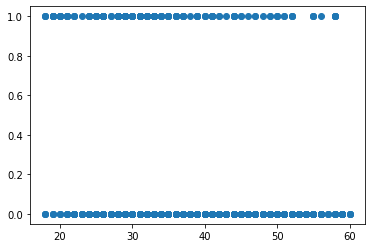

In [12]:
# Draw a scatter plot between Age and Attrition

plt.scatter(df['Age'],df['Attrition'])

In [13]:
df[(df.Attrition==1) & (df.Age>50)].count()

Age                         14
Attrition                   14
BusinessTravel              14
DailyRate                   14
Department                  14
DistanceFromHome            14
Education                   14
EducationField              14
EmployeeCount               14
EmployeeNumber              14
EnvironmentSatisfaction     14
Gender                      14
HourlyRate                  14
JobInvolvement              14
JobLevel                    14
JobRole                     14
JobSatisfaction             14
MaritalStatus               14
MonthlyIncome               14
MonthlyRate                 14
MonthlyRateNew              14
NumCompaniesWorked          14
OverTime                    14
PercentSalaryHike           14
PerformanceRating           14
RelationshipSatisfaction    14
StockOptionLevel            14
TotalWorkingYears           14
TrainingTimesLastYear       14
WorkLifeBalance             14
YearsAtCompany              14
YearsInCurrentRole          14
YearsSin

In [14]:
df[(df.Attrition==0) & (df.Age>50)].count()

Age                         102
Attrition                   102
BusinessTravel              102
DailyRate                   102
Department                  102
DistanceFromHome            102
Education                   102
EducationField              102
EmployeeCount               102
EmployeeNumber              102
EnvironmentSatisfaction     102
Gender                      102
HourlyRate                  102
JobInvolvement              102
JobLevel                    102
JobRole                     102
JobSatisfaction             102
MaritalStatus               102
MonthlyIncome               102
MonthlyRate                 102
MonthlyRateNew              102
NumCompaniesWorked          102
OverTime                    102
PercentSalaryHike           102
PerformanceRating           102
RelationshipSatisfaction    102
StockOptionLevel            102
TotalWorkingYears           102
TrainingTimesLastYear       102
WorkLifeBalance             102
YearsAtCompany              102
YearsInC

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

Age                         856
Attrition                   856
BusinessTravel              856
DailyRate                   856
Department                  856
DistanceFromHome            856
Education                   856
EducationField              856
EmployeeCount               856
EmployeeNumber              856
EnvironmentSatisfaction     856
Gender                      856
HourlyRate                  856
JobInvolvement              856
JobLevel                    856
JobRole                     856
JobSatisfaction             856
MaritalStatus               856
MonthlyIncome               856
MonthlyRate                 856
MonthlyRateNew              856
NumCompaniesWorked          856
OverTime                    856
PercentSalaryHike           856
PerformanceRating           856
RelationshipSatisfaction    856
StockOptionLevel            856
TotalWorkingYears           856
TrainingTimesLastYear       856
WorkLifeBalance             856
YearsAtCompany              856
YearsInC

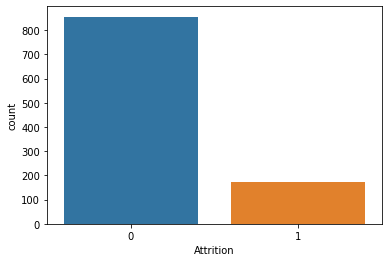

In [15]:
# Get a series of counts of values of Attrition
print(df[(df.Attrition==0)].count())
print(df[(df.Attrition==1)].count())
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(df.Attrition)


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

In [16]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
pd.crosstab(df.BusinessTravel, df.Attrition)
# Travel_Rarely with Attrition==0 has highest number of people

Attrition,0,1
BusinessTravel,,
Non-Travel,92,10
Travel_Frequently,150,47
Travel_Rarely,614,115


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

In [0]:
x = df.Attrition.unique()

In [0]:
y1=np.array([df[(df.Gender=='Male')&(df.Attrition==1)].shape[0],df[(df.Gender=='Male')&(df.Attrition==0)].shape[0]])
y2=np.array([df[(df.Gender=='Female')&(df.Attrition==1)].shape[0],df[(df.Gender=='Female')&(df.Attrition==0)].shape[0]])

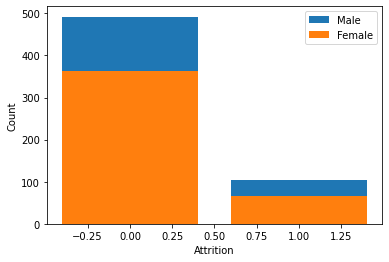

In [19]:
plt.bar(x,y1,label = 'Male')
plt.bar(x,y2,label = 'Female')
#plt.bar(stacked=True)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.legend()

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

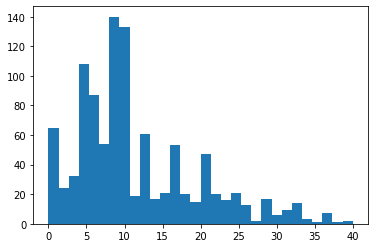

In [20]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears,bins=30)

Seems to be negatively skewed


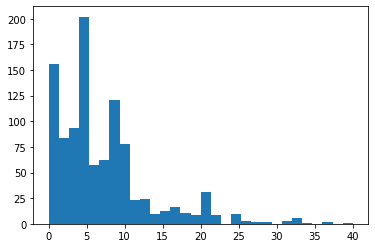

In [21]:
# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany,bins=30)

print('Seems to be negatively skewed')

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


In human resourcs there seems to be outliers


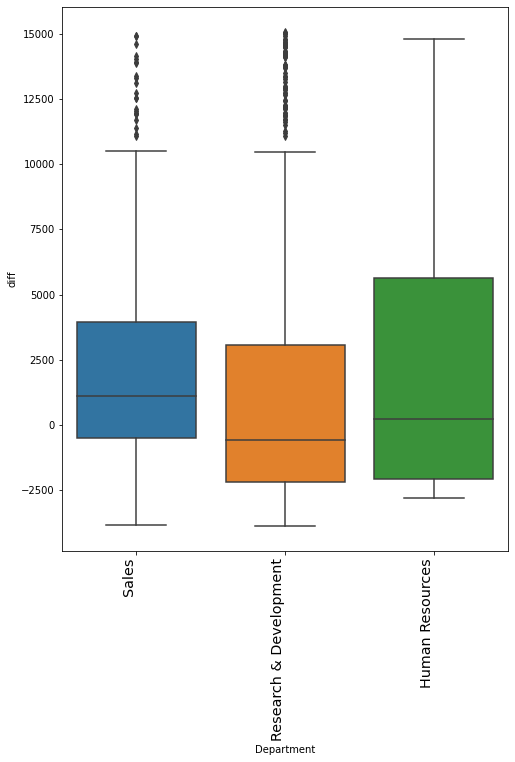

In [22]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 

plt.figure(figsize=(8,10))
df['diff'] = df['MonthlyIncome'] - df['MonthlyIncome'].median()
chart = sns.boxplot('Department', 'diff', data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
print('In human resourcs there seems to be outliers')

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

In [23]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
job_role = df.JobRole.value_counts()
print(job_role)
print("Sales_Executives has the highest number of persons")


Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64
Sales_Executives has the highest number of persons


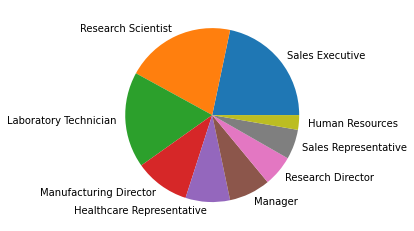

In [24]:
#plt.pie(job_role)
plt.pie(job_role, labels=job_role.index.tolist())
plt.show()

In [0]:
job_role_uniq = df.JobRole.unique()

In [26]:
print("The number of unique value_counts in Job-Role is:",len(job_role_uniq))

The number of unique value_counts in Job-Role is: 9
